In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression and Machine Learning

<!-- requirement: data/gas_consumption.csv -->

The power of quantitative sciences comes from the insight we can derive from mathematical relationships between different measurements. We can use these insights to make predictions about what will happen in the future. The simplest possible relationship between two variables is a linear relationship

$$y_i \approx \beta_0 + \beta_1x_i$$

If we can measure some $(x_i, y_i)$ pairs, we could calculate our _model parameters_ $\beta_0$ and $\beta_1$. Then we could predict $y$ in the future based on $x$, or even try to influence $y$ in the future by controlling $x$.

In [3]:
gas = pd.read_csv('./data/gas_consumption.csv', names=['tax', 'income', 'highway', 'drivers', 'gas'])
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


In [4]:
from ipywidgets import interact
def plotter (feature):
    plt.plot(gas[feature], gas.gas, '.',c='b')
    plt.xlabel(feature)
    plt.ylabel('Gas consumption (millions of gallons)')
menu = gas.columns
interact(plotter, feature=menu);

interactive(children=(Dropdown(description='feature', options=('tax', 'income', 'highway', 'drivers', 'gas'), …

let's use one of the features. lets see how the value we want to predict, the gas consumption, varies with the percentage of population of these drivers.


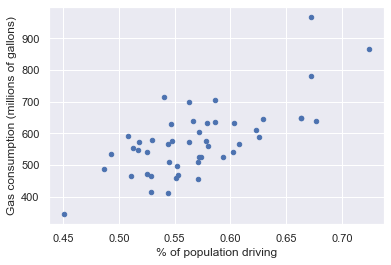

In [5]:
gas.plot(x='drivers', y='gas', kind='scatter', c='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions of gallons)');

**simple graph. so what do we observe here from the graph? we see a general trend when we plot our data. as the number of drivers increases, the gas consumption also is gonna increase. its a alinear trend. so we need to draw that line of  best fit through our data points. Now the question here is, where should we draw a line that's going to best fit this data. where shd i position it, what slope shd it have, what intercept shd i have thats going to best fit the data.**

We could try to draw a line describing the trend in the data, but which is the best one?

**we can go ahead and manual do this. lets plot some two graphs through our data.
we see its diiificult to decide ehich line is best to use, red or green? if i ask you, some of you will say, its the green some will say its the red one**


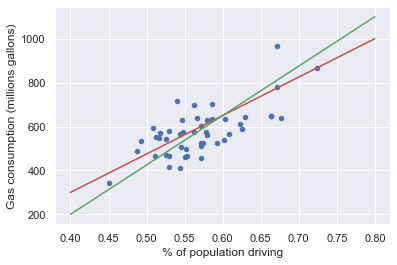

In [6]:
gas.plot(x='drivers', y='gas', kind='scatter', c='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

plt.plot([.4, .8], [300, 1000], c='r')
plt.plot([.4, .8], [200, 1100], c='g');

**to get oue best fit line, lets use amore systematic approach to decide which line shd we use. so here we gotta talk about a metric of interest to derive some measure  of error in our model. we are sure either of these two lines will have error, one has less error than the other so we shd go ahead and use model that has the least error
Am talking about error, lets be more concrete what we mean by error. we gonna define error simply as true value for giben obsevation minus the model output for that obe=servation. so the deviation from the true values is our error, we want it to be as small as possible
specifically what we gonna do is sum the square of all the errors of all our observations, so we can define the MSE lets find our goal with linear regression
what is tryna do is figure out how shd we set Beta1, how shd be set beta0, how shd we set these model parameters such that we gonna have the lowest MSE from our training set. Since LR object is to reduce the MSE, its often called the objective function, cost function or loss function, MSE this is what we tryna minimize wen we train the model. This is for LR other modelw will have differnt cost functions but the idea is the same. in these models, thers some objective some cost its tryna reduce its gonna modify look for model coeficients model parameters that is going to reduce this cost function, the minimum of this cost function**

In order to compare the different trend lines we need to define a **metric** for how well they describe the actual data. The metric should reflect what we value about our trend line. We want our trend line to reliably predict a y-value given an x-value, so it would be reasonable to construct our metric based on the **error** between the trend line and the y-values.

$$ e_i = y_i - (\beta_0 + \beta_1x_i) $$

We want to make the total error as small as possible. Since sometimes the errors will be positive and some will be negative, if we add them together they might cancel out. We don't care if the error is positive or negative, we want the _absolute value_ to be small. Instead of minimizing the total error, we'll minimize the total squared error. Often we divide it by the number of data points, $n$, which is called the **mean squared error** (MSE).

$$ MSE = \frac{1}{n}\sum_i e_i^2 $$

**Since $e_i$ depends on our model parameters $\beta_0$ and $\beta_1$, we can tweak our model (the trend line) until the MSE is minimized. In the language of machine learning, the MSE would be called the** **cost function** or **loss function**. For different machine learning tasks, we will define different cost functions (or **objective functions/utility functions**, which we seek to maximize instead of minimize).

**so lets use LR. lets import lr class from  sklearn, lets create lr model. we gona set the fit_intecept key word to true. its the default we can decide not to define it here its the same. we can set it to false its gonna fit data to model but wont include the intercept. les look at some documentation
let fit our data to only include the driver feature on the gas consumption we tryna predict lets go on plot the data
lets also use our model to make predictions
lets create some linear space or data using numpy linspace function from .4 to .8, remeber we gona reshape it coz sklearn wants the data to be 2 dimensions as rows and columns 
let pass this created value or matrix into the predict methd of our trained model
so wen call the fit metd, what do you think is happening is happening underneath the hod,  wen call the fit metd? we cant see whats happening but we can tell
well, wen use the fit metd, sklearn is tryna figure out what are the good better coeficient model parameters to use to best draw a line thru ur data so that we have the lowest MSE by using a method called gradient descent
**

(50, 1)


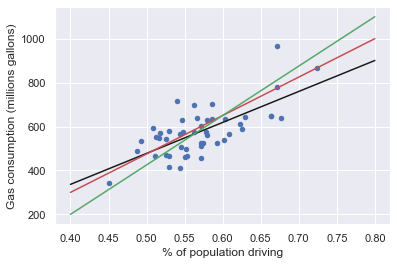

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(gas[['drivers']], gas['gas'])

gas.plot(x='drivers', y='gas', kind='scatter', c='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

x = np.linspace(.4, .8).reshape(-1, 1)
print(x.shape)
predictions = linreg.predict(x)
plt.plot(x, predictions, c='k')
plt.plot([.4, .8], [300, 1000], c='r')
plt.plot([.4, .8], [200, 1100], c='g');

**lets see how well the model performs. we have the line in black is the predicted values from our trained model. so this black line is the line thats gonna reduce mse the most compared to any other line we can draw thru our data
so we trained our model and lest talk about how we can look up the model coeficients. remember our lr firmula y = B1X1 + B0.  B1 IS OUR SLOPE, B0 OUR Y-INTERCPET
lets find out what these values are because we only know them after we fit the model.
sklearn use a convention that sklearn uses in which atrtributes of a model that are determined after fitting process are gonna end with a underscore
intercept_ will return the scalar value of intercept
coef_ will return a numpy array of model coeficients. notice we only have one model coef
if you wanna know what other attributes we have, use the documentation**

In [8]:
(linreg.intercept_, linreg.coef_[0])

(-227.3091174945256, 1409.8421113288002)

**we left off discussing the lr model will try figure out what are the best parameters, beta2 and beta0, to draw the line thru our data set. we dint talk about ehat exaclt is it doing. is it just guessing or is it using try and error, how does it chose the best values of these parameters to reduce the MSE? 
one way the alg uses is by applying gradient descent.**

## Gradient descent

How did we find the model parameters that minimize the cost function? Let's plot the cost function with respect to $\beta_1$ to get an idea.

**for this plot here, lets plot the MSE various values of beta1, of the slope, we gonna set beta0 constant and play around with modifying beta1. what were doing lets measure error if we start pivoting these lines for different slopes.
note we kept beta0 conatant, we can modify it and genearate a 2d space instaed of 1d space. so we have the MSE metric on y axis, and the value of the slope on the x axis.
we see here that the lowest value occurs almost there. true answer is 1409
anything interesting on the follwong curve? weel if we look we have a minimum value. its shape is a convex shape
lets apply GD. gd is gonna start off at some initial point in space. eg at b1 = 1300 at a very high error. gd is gonna calc grad at some starting point, then using that grad its gonna decide which direction it shud step,coz grad will tell the log direction of greatest ascent, in otherwords if you find grad at some piint, that will tell the direc u must go to inrease the function value, since now u wanna decrease the function value, u gonna take the opposute step
lets say you are hiking in some space, tryna find the valley, its very foggy, u cant see were u are going, maybe can see afew feet from where u position and u notice that a certain directio will take u down the furthest. u=so u take a step in that direc. u take the step, u can see alittle more of yo surrounding, and then u decide given wea u are now, wea should u next step. thats basically wat gd is doing, u at apoint figure out the direction of greatest descent,and u take the step in that direction and u reevaluate where shu i step next and repeat the process, its an iteration repeat untill you reach this minimum value. 
so here, shud you go d left or right, shud u increase beta1 or decrease beta1 given direction, the model will take a step on the left towards higher values of beta1, and reevaluate, okay here i am in space, where shud i move next, ooh it still says jeep on moving ti the right coz i will be decreasing the CF and further reducing CF because its the one i wanna reduce minimize by modifying my model coefs we repeat the process and see what happens eventually. eventually, its gonna reach this minim value. its gona stay there coz if the algo move beyond to the right this value, it will notice its gonna increase the  error thE CF, so here it has found the global minim. this is the point, the beta1 value that gonna decrease the cf by the most, thats what the parameter is gonna use for the analysis.
when working with lr, you might wondering au guaranted is this algo gyaranted to converge to the lowest value of the cf. in lr, we are guarnted to connverge to the global minm of our cf so longer as we take small enough steps in our gd search. if we take large steps, we might miss the minim value if youre a gant like hulk.
i woudlnt worry playing ROUND with the parameters when using lr u can modify some of these things, but the default values best to use **


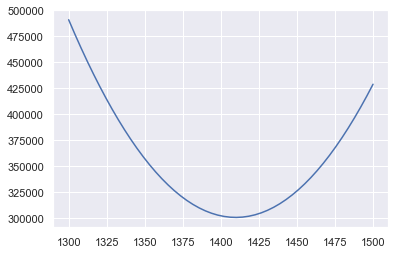

In [9]:
beta0 = linreg.intercept_
beta1 = np.linspace(1300, 1500)

MSE = [((gas['gas'] - (beta0 + m * gas['drivers']))**2).sum() for m in beta1]

plt.plot(beta1, MSE);

If we started with some initial guess $\beta_1 = 1300$, we could simply follow the slope of the MSE downhill with respect to $\beta_1$. We could calculate the MSE around 1300 to work out which way is downhill, and then update $\beta_1$ in that direction. With each step we move closer and closer to the bottom of the valley at 1409.

This method of always going downhill from where we are is called **gradient descent**. In general the loss function could be very complicated and we won't be able to solve where the minimum is directly. Gradient descent gives us an algorithm for finding our way to the minimum when we don't know where it is in advance.

For example, the `HuberRegressor` also optimizes a linear model, but [uses a more complicated loss function](http://scikit-learn.org/stable/modules/linear_model.html#huber-regression). The Huber loss is less influenced by outliers than the MSE.

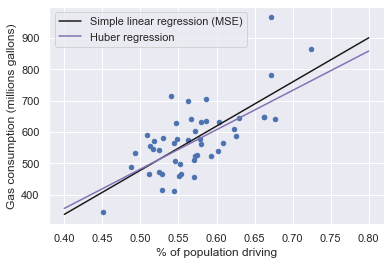

In [10]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(fit_intercept=True, alpha=0)
huber.fit(gas[['drivers']], gas['gas'])
gas.plot(x='drivers', y='gas', kind='scatter', c='b')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

x = np.linspace(.4, .8).reshape(-1, 1)
plt.plot(x, linreg.predict(x), 'k-')
plt.plot(x, huber.predict(x), 'm-')
plt.legend(['Simple linear regression (MSE)', 'Huber regression']);

## Multivariate regression

Looking again at our DataFrame, we see we have other variables we could use to predict gas consumption.

In [11]:
widgets?

Object `widgets` not found.


In [12]:
from ipywidgets import widgets

feature_desc = {'tax': 'Gas tax', 'drivers': '% of population driving', 'income': 'Average income (USD)', 'highway': 'Miles of paved highway'}

def plot_feature(column):
    plt.plot(gas[column], gas['gas'], '.')
    plt.xlabel(feature_desc[column])
    plt.ylabel('Gas consumption (millions gallons)')

dropdown_menu = {value: key for key, value in feature_desc.items()}

widgets.interact(plot_feature, column=dropdown_menu);

interactive(children=(Dropdown(description='column', options={'Gas tax': 'tax', '% of population driving': 'dr…

To use all of these predictors (called **features**), we will need to fit a slightly more complicated function

$$ y_i \approx \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \beta_3x_{3i} + \beta_4x_{4i} $$

or more generally

$$ y_i \approx  \sum_j\beta_jX_{ij} $$

where $i$ labels different **observations** and $j$ labels different **features**. When we have one feature, we solve for a line; when we have two features, we solve for a plane; and so on, even if we can't imagine higher dimensional spaces.

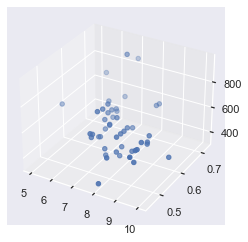

In [13]:
from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().gca(projection='3d')
plt3d.scatter(gas['tax'], gas['drivers'], gas['gas']);

In [14]:
linreg.fit(gas[['tax', 'drivers']], gas['gas'])

LinearRegression()

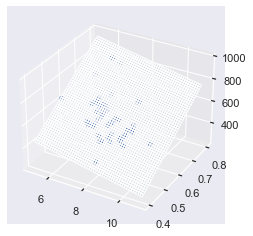

In [15]:
plt3d = plt.figure().gca(projection='3d')

xx, yy = np.meshgrid(np.linspace(5, 11), np.linspace(.4, .8))
z = linreg.intercept_ + linreg.coef_[0] * xx + linreg.coef_[1] * yy
plt3d.plot_surface(xx, yy, z, alpha=.1)
plt3d.scatter(gas['tax'], gas['drivers'], gas['gas']);

In [16]:
from ipywidgets import interact

def plot_cross(tax=5):
    x = np.linspace(.4, .8)
    plt.plot(x, linreg.intercept_ + linreg.coef_[0]*tax + linreg.coef_[1]*x)
    alpha = 1 - abs(gas['tax'] - tax) / abs(gas['tax'] - tax).max()
    colors = np.zeros((len(gas), 4))
    colors[:, 3] = alpha
    plt.scatter(gas['drivers'], gas['gas'], color=colors)

interact(plot_cross, tax=(5,11,1));

interactive(children=(IntSlider(value=5, description='tax', max=11, min=5), Output()), _dom_classes=('widget-i…

In [17]:
X = gas[['tax', 'income', 'highway', 'drivers']]
y = gas['gas']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [20]:
lr = pipe.named_steps['regressor']
lr

LinearRegression()

In [21]:
rl = pipe.named_steps['scaler']
rl.var_

array([8.85130556e-01, 3.22189139e+05, 1.19366510e+07, 3.01284722e-03])

In [22]:
rl.set_params

<bound method BaseEstimator.set_params of StandardScaler()>

In [23]:
lr.coef_

array([-32.7310515 , -37.79691223,  -8.3813148 ,  73.3569154 ])

In [24]:
coef = np.abs(lr.coef_)
coef/coef.sum()

array([0.21495941, 0.24822918, 0.05504383, 0.48176758])

*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*